# Importation

In [3]:
import pandas as pd
import numpy as np
import glob
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches

from torch.utils.data import Dataset, DataLoader
from models.nfl_attention_model import NFLAttentionModel
from models.nfl_seq2seq import NFLSeq2SeqModel
from data.nfl_dataset import NFLDataset
from models.methods import train_model, evaluate_model
from tqdm import tqdm

In [9]:
# 2. Chargement
dataset = NFLDataset()
train_set, val_set = dataset.split()
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=True)


🚀 Entraînement avec Normalisation...
Epoch 1 | Loss: 16.9134 | Erreur estimée: 41.13 yards
Epoch 2 | Loss: 8.6588 | Erreur estimée: 29.43 yards
Epoch 3 | Loss: 7.8655 | Erreur estimée: 28.05 yards
Epoch 4 | Loss: 7.3004 | Erreur estimée: 27.02 yards
Epoch 5 | Loss: 6.8797 | Erreur estimée: 26.23 yards
Epoch 6 | Loss: 6.8390 | Erreur estimée: 26.15 yards
Epoch 7 | Loss: 6.5533 | Erreur estimée: 25.60 yards
Epoch 8 | Loss: 6.2685 | Erreur estimée: 25.04 yards
Epoch 9 | Loss: 6.0822 | Erreur estimée: 24.66 yards
Epoch 10 | Loss: 5.8718 | Erreur estimée: 24.23 yards
Epoch 11 | Loss: 5.7561 | Erreur estimée: 23.99 yards
Epoch 12 | Loss: 5.7521 | Erreur estimée: 23.98 yards
Epoch 13 | Loss: 5.3212 | Erreur estimée: 23.07 yards
Epoch 14 | Loss: 5.3422 | Erreur estimée: 23.11 yards
Epoch 15 | Loss: 5.0739 | Erreur estimée: 22.53 yards
Epoch 16 | Loss: 5.0511 | Erreur estimée: 22.47 yards
Epoch 17 | Loss: 5.0582 | Erreur estimée: 22.49 yards
Epoch 18 | Loss: 5.0640 | Erreur estimée: 22.50 yards

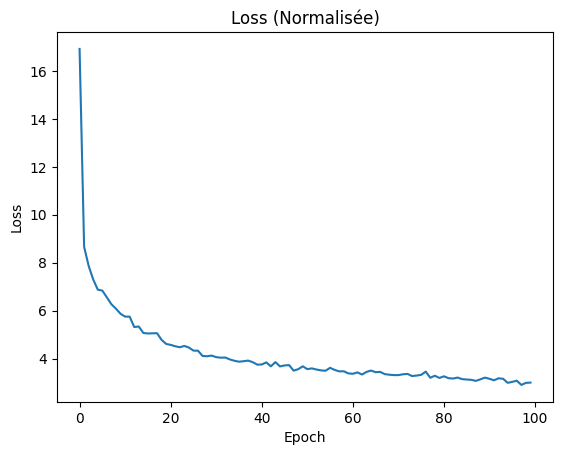

In [10]:
# --- CONFIGURATION ---
NUM_EPOCHS = 100  #Number of epochs for training
BATCH_SIZE = 32
LEARNING_RATE = 0.001  # 0.0005

# embed_dim=128 donne plus de capacité
model = NFLAttentionModel(
    receiver_dim=90,  # 9 features * 10 frames
    defender_dim=9,  # 8 features + 1 flag mate or ennemy
    embed_dim=64,
    num_heads=4
)

optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.MSELoss()

train_model(model=model, train_loader=train_loader, criterion=criterion, optimizer=optimizer, num_epochs=NUM_EPOCHS)

# Visualisation

In [ ]:
import random as rd
from src.utils import prepare_input, prepare_test_input
from src.visualisation import animate_prediction, animate_test_prediction

